In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_keys

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_keys

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 46.38,
  'feels_like': 38.16,
  'temp_min': 44.01,
  'temp_max': 48.99,
  'pressure': 1028,
  'humidity': 65},
 'visibility': 10000,
 'wind': {'speed': 9.17, 'deg': 70},
 'clouds': {'all': 90},
 'dt': 1603678700,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1603624163,
  'sunset': 1603662411},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [9]:
# Get the JSON data.
boston_data = city_weather.json()

In [10]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 48.99 65 90 9.17


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 10, 26, 2, 18, 20)

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | domoni
Processing Record 5 of Set 1 | yermakovskoye
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | ponta do sol
Processing Record 9 of Set 1 | karaul
City not found. Skipping...
Processing Record 10 of Set 1 | peleduy
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 13 of Set 1 | ixmiquilpan
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | andevoranto
City not found. Skipping...
Processing Record 19 of Set 1 | pingxiang
Processing Record 20 of Set 1 | k

Processing Record 37 of Set 4 | dunedin
Processing Record 38 of Set 4 | saint-augustin
Processing Record 39 of Set 4 | tapah
Processing Record 40 of Set 4 | luzhou
Processing Record 41 of Set 4 | portland
Processing Record 42 of Set 4 | lolua
City not found. Skipping...
Processing Record 43 of Set 4 | tromso
Processing Record 44 of Set 4 | guaymas
Processing Record 45 of Set 4 | isparta
Processing Record 46 of Set 4 | coihaique
Processing Record 47 of Set 4 | victor harbor
Processing Record 48 of Set 4 | torbeyevo
Processing Record 49 of Set 4 | thayetmyo
Processing Record 50 of Set 4 | cabo san lucas
Processing Record 1 of Set 5 | jiaocheng
Processing Record 2 of Set 5 | belyy yar
Processing Record 3 of Set 5 | castro
Processing Record 4 of Set 5 | la libertad
Processing Record 5 of Set 5 | hay river
Processing Record 6 of Set 5 | asau
Processing Record 7 of Set 5 | saldanha
Processing Record 8 of Set 5 | saint george
Processing Record 9 of Set 5 | codrington
Processing Record 10 of S

Processing Record 28 of Set 8 | gweta
Processing Record 29 of Set 8 | motomiya
Processing Record 30 of Set 8 | sangar
Processing Record 31 of Set 8 | chagda
City not found. Skipping...
Processing Record 32 of Set 8 | rocha
Processing Record 33 of Set 8 | jalu
Processing Record 34 of Set 8 | marcona
City not found. Skipping...
Processing Record 35 of Set 8 | chuy
Processing Record 36 of Set 8 | kurchum
Processing Record 37 of Set 8 | longyearbyen
Processing Record 38 of Set 8 | visby
Processing Record 39 of Set 8 | pochutla
Processing Record 40 of Set 8 | shingu
Processing Record 41 of Set 8 | adre
Processing Record 42 of Set 8 | bambanglipuro
Processing Record 43 of Set 8 | san jeronimo
Processing Record 44 of Set 8 | green river
Processing Record 45 of Set 8 | berdigestyakh
Processing Record 46 of Set 8 | navolato
Processing Record 47 of Set 8 | santo tomas
Processing Record 48 of Set 8 | the valley
Processing Record 49 of Set 8 | sakakah
Processing Record 50 of Set 8 | talnakh
Proces

Processing Record 18 of Set 12 | kamenz
Processing Record 19 of Set 12 | clyde
Processing Record 20 of Set 12 | garowe
Processing Record 21 of Set 12 | karaman
Processing Record 22 of Set 12 | jiddah
City not found. Skipping...
Processing Record 23 of Set 12 | avera
Processing Record 24 of Set 12 | bargal
City not found. Skipping...
Processing Record 25 of Set 12 | aflu
City not found. Skipping...
Processing Record 26 of Set 12 | orgun
City not found. Skipping...
Processing Record 27 of Set 12 | danilov
Processing Record 28 of Set 12 | heidenreichstein
Processing Record 29 of Set 12 | west bay
Processing Record 30 of Set 12 | aksu
Processing Record 31 of Set 12 | puerto ayacucho
Processing Record 32 of Set 12 | meyungs
City not found. Skipping...
Processing Record 33 of Set 12 | tautira
Processing Record 34 of Set 12 | chokurdakh
Processing Record 35 of Set 12 | ostrovnoy
Processing Record 36 of Set 12 | wakkanai
Processing Record 37 of Set 12 | bajil
Processing Record 38 of Set 12 | k

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,57.00,51,99,5.01,NZ,2020-10-26 02:19:36
1,Hilo,19.73,-155.09,87.80,55,1,12.75,US,2020-10-26 02:14:46
2,New Norfolk,-42.78,147.06,61.00,49,0,1.99,AU,2020-10-26 02:19:36
3,Domoni,-12.26,44.53,76.06,79,0,7.29,KM,2020-10-26 02:19:37
4,Yermakovskoye,53.28,92.40,32.95,74,100,5.23,RU,2020-10-26 02:19:37
5,Thompson,55.74,-97.86,23.00,73,90,3.36,CA,2020-10-26 02:19:37
6,Cape Town,-33.93,18.42,61.00,77,0,11.41,ZA,2020-10-26 02:19:37
7,Ponta Do Sol,32.67,-17.10,66.20,68,20,5.82,PT,2020-10-26 02:19:37
8,Peleduy,59.63,112.74,26.92,96,100,6.80,RU,2020-10-26 02:19:38
9,Atuona,-9.80,-139.03,79.05,73,0,19.69,PF,2020-10-26 02:19:38


In [14]:
#Reorder Columns 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2020-10-26 02:19:36,-46.19,168.86,57.00,51,99,5.01
1,Hilo,US,2020-10-26 02:14:46,19.73,-155.09,87.80,55,1,12.75
2,New Norfolk,AU,2020-10-26 02:19:36,-42.78,147.06,61.00,49,0,1.99
3,Domoni,KM,2020-10-26 02:19:37,-12.26,44.53,76.06,79,0,7.29
4,Yermakovskoye,RU,2020-10-26 02:19:37,53.28,92.40,32.95,74,100,5.23
...,...,...,...,...,...,...,...,...,...
555,Bin Qirdan,TN,2020-10-26 02:21:54,33.14,11.22,67.26,78,0,7.00
556,Quang Ngai,VN,2020-10-26 02:21:54,15.12,108.80,76.73,90,100,4.83
557,Brigantine,US,2020-10-26 02:21:55,39.41,-74.36,60.01,93,90,4.70
558,Izumo,JP,2020-10-26 02:21:55,35.37,132.77,66.20,59,20,1.12


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

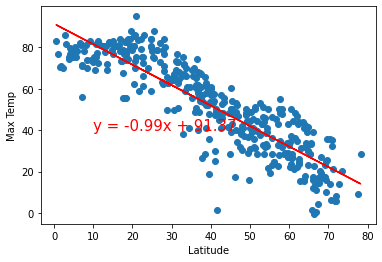

In [24]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum \nfor Maximum Temperature', 'Max Temp',(10,40))

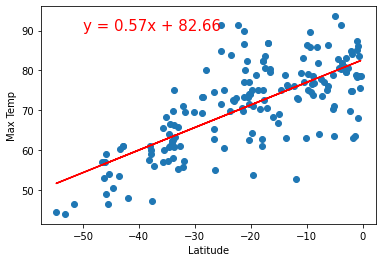

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

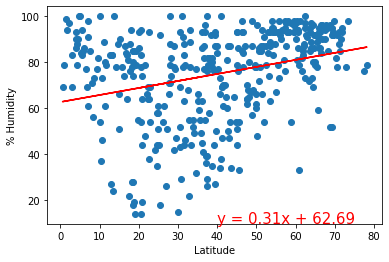

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

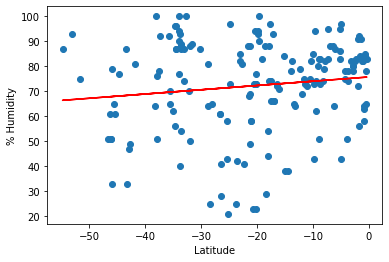

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

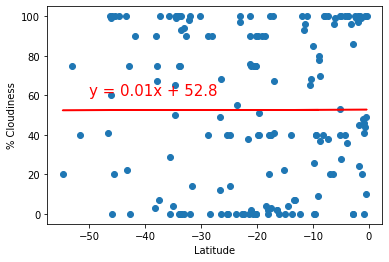

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

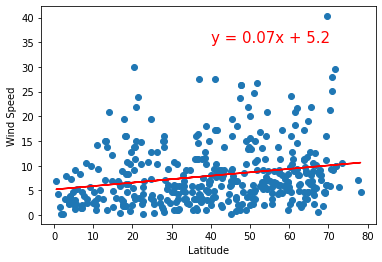

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

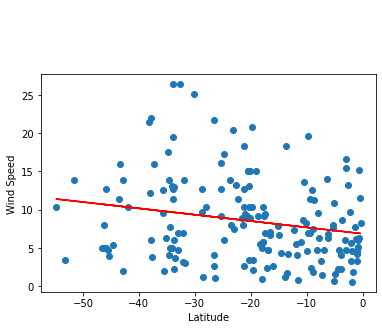

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))